Task 1: Load the dataset

In [23]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r'C:\Users\Public\Yomi\Python\Bravplus Project\winequality-red.csv')

# Display the first few rows of the dataset
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

Task 2: Check for null and inconsistent values

In [7]:
# Check for null values
print(df.isnull().sum())

# Check for inconsistent values (if any)
# This depends on the specific requirements of your dataset.
# You may want to check if values fall within expected ranges.

# If inconsistent values are found, you can clean the dataset.

# Example: Remove rows with null values
df = df.dropna()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [6]:
# Check for inconsistent values
print(data.describe(include='all'))

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

Task 3: Data Cleaning (if needed)

In [8]:
# Perform any required cleaning steps here
# Example: Removing duplicates
df = df.drop_duplicates()

Task 4: Exploratory Data Analysis (EDA)

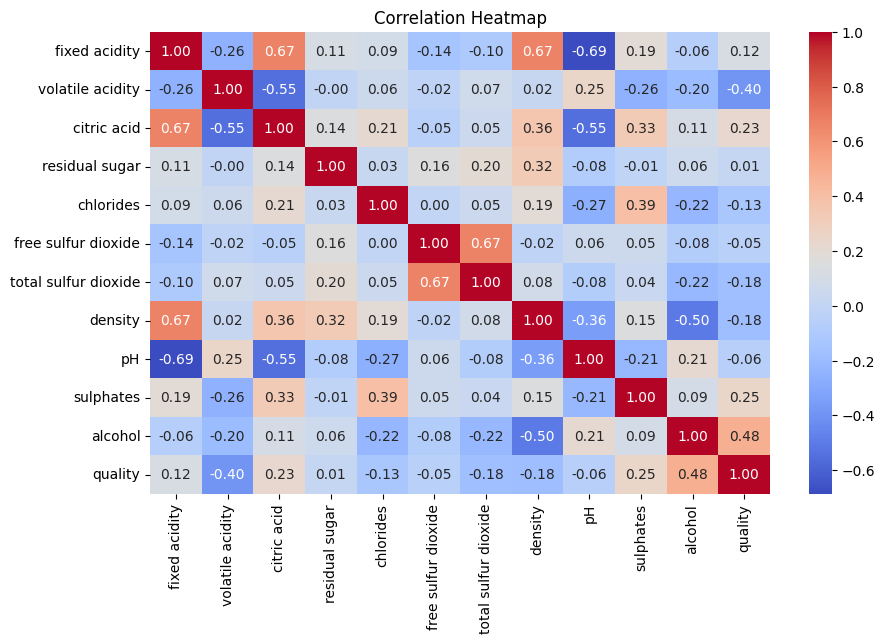

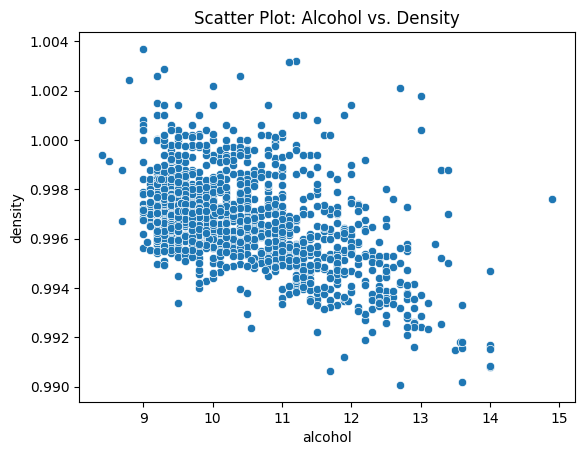

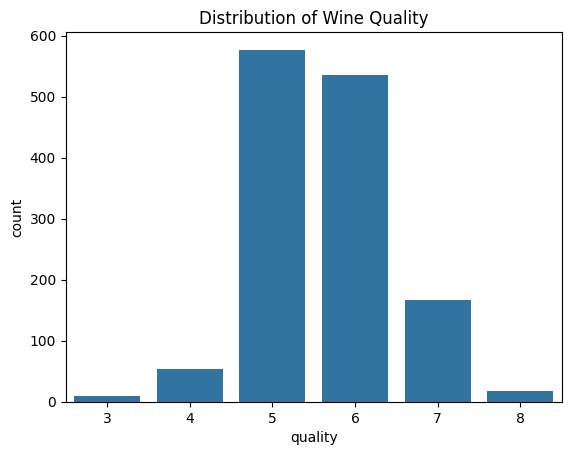

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of correlations
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Create scatter plots for variables with strong correlation
# Example: Alcohol vs. Density
sns.scatterplot(x='alcohol', y='density', data=df)
plt.title('Scatter Plot: Alcohol vs. Density')
plt.show()

# Bar chart for the distribution of the target variable
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality')
plt.show()

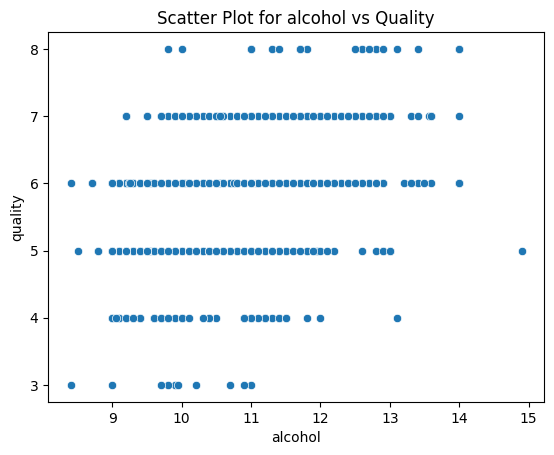

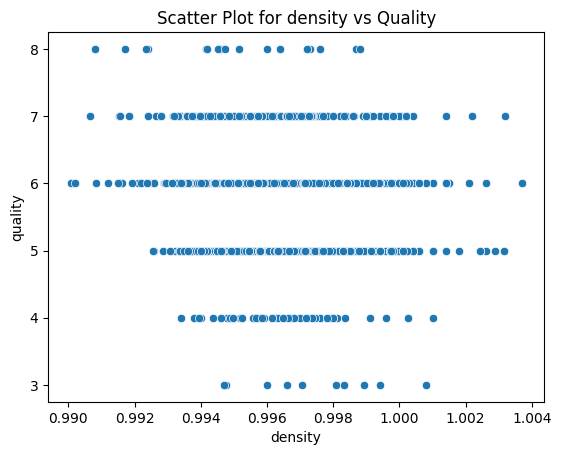

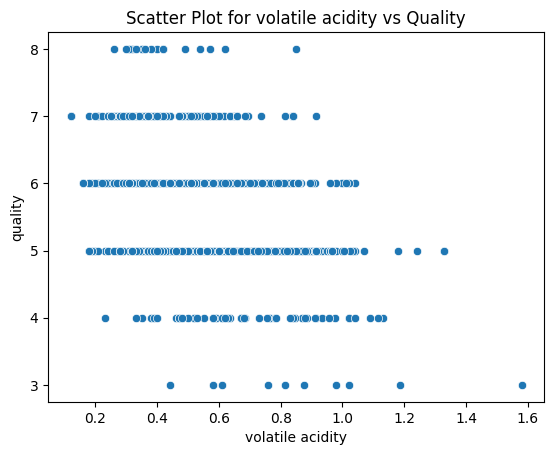

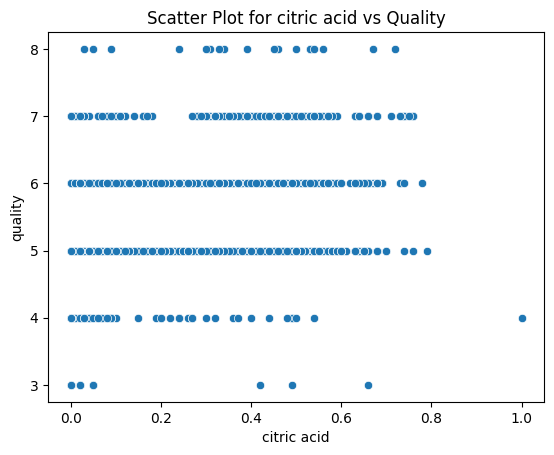

In [11]:
# Scatter plots for variables with strong correlation
strong_correlation_vars = ['alcohol', 'density', 'volatile acidity', 'citric acid']
for var in strong_correlation_vars:
    sns.scatterplot(x=var, y='quality', data=data)
    plt.title(f'Scatter Plot for {var} vs Quality')
    plt.show()

Task 5: Train machine learning models

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into features (X) and target variable (y)
X = df.drop('quality', axis=1)
y = df['quality']

# Split the data into training and testing sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_predictions = log_reg.predict(X_test)

# Display results
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, log_reg_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_reg_predictions))
print("Classification Report:\n", classification_report(y_test, log_reg_predictions))

Logistic Regression:
Accuracy: 0.5808823529411765
Confusion Matrix:
 [[ 0  0  4  0  0  0]
 [ 0  0  5  6  0  0]
 [ 0  0 88 32  0  0]
 [ 0  0 31 70  2  0]
 [ 0  0  4 27  0  0]
 [ 0  0  0  3  0  0]]
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        11
           5       0.67      0.73      0.70       120
           6       0.51      0.68      0.58       103
           7       0.00      0.00      0.00        31
           8       0.00      0.00      0.00         3

    accuracy                           0.58       272
   macro avg       0.20      0.24      0.21       272
weighted avg       0.49      0.58      0.53       272



C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:147

Task 5: Train machine learning models 2

In [17]:
# Train models

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


models = [DecisionTreeClassifier(), SVC()]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Display results
    print(f"\nResults for {model.__class__.__name__}:")
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


Results for DecisionTreeClassifier:
Accuracy Score: 0.47794117647058826
Confusion Matrix:
 [[ 0  0  3  1  0  0]
 [ 1  0  5  4  1  0]
 [ 2  5 67 44  2  0]
 [ 0  3 30 50 18  2]
 [ 0  1  2 15 13  0]
 [ 0  0  0  1  2  0]]
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        11
           5       0.63      0.56      0.59       120
           6       0.43      0.49      0.46       103
           7       0.36      0.42      0.39        31
           8       0.00      0.00      0.00         3

    accuracy                           0.48       272
   macro avg       0.24      0.24      0.24       272
weighted avg       0.48      0.48      0.48       272


Results for SVC:
Accuracy Score: 0.48161764705882354
Confusion Matrix:
 [[ 0  0  0  4  0  0]
 [ 0  0  2  9  0  0]
 [ 0  0 43 77  0  0]
 [ 0  0 16 87  0  0]
 [ 0  0  2 28  1  0]
 [ 0  0  1  2  0  0]]
Classification

C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Task 6: Train ensemble algorithm

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier (ensemble algorithm)
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

# Display results
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))

Random Forest Classifier:
Accuracy: 0.6470588235294118
Confusion Matrix:
 [[ 0  0  4  0  0  0]
 [ 0  0  4  7  0  0]
 [ 0  1 89 30  0  0]
 [ 0  0 24 72  7  0]
 [ 0  0  2 14 15  0]
 [ 0  0  0  1  2  0]]
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        11
           5       0.72      0.74      0.73       120
           6       0.58      0.70      0.63       103
           7       0.62      0.48      0.55        31
           8       0.00      0.00      0.00         3

    accuracy                           0.65       272
   macro avg       0.32      0.32      0.32       272
weighted avg       0.61      0.65      0.63       272



C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [22]:
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your regression models
model1 = LinearRegression()
model2 = KNeighborsRegressor()
model3 = RandomForestRegressor()

# Create a list of tuples with (name, model) pairs
estimators = [('lr', model1), ('knn', model2), ('rf', model3)]

# Create a VotingRegressor
voting_reg = VotingRegressor(estimators=estimators)

# Fit the model
voting_reg.fit(X_train, y_train)

# Make predictions
y_pred = voting_reg.predict(X_test)

# Evaluate the model using regression metrics
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Absolute Error: 0.5153112001500398
Mean Squared Error: 0.43737772832010074
R-squared: 0.3825451971676621
